In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.image as img
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/content/drive/My Drive/CS610/Code/Dataset', output="output", seed=2022, ratio=(.8, 0.1,0.1))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 6400 files [02:55, 36.43 files/s] 


In [ ]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64 # number of training examples utilized in on iteration
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

Found 5119 files belonging to 4 classes.
Found 642 files belonging to 4 classes.
Found 639 files belonging to 4 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
dic = {} #store one images for each class
count = 0
for images, labels in train_ds.take(1): # randomly datasets generated by 1
  while count < len(labels):
    if class_names[labels[count]] not in dic:
      dic[class_names[labels[count]]] = images[count]
    count += 1
len(dic)

4

In [ ]:
labels = list(dic.keys())
images = list(dic.values())

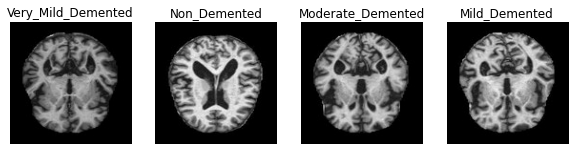

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(4):
  ax = plt.subplot(1, 4, i + 1)
  plt.imshow(images[i].numpy().astype("uint8"))
  plt.title(labels[i])
  plt.axis("off")


<function matplotlib.pyplot.show>

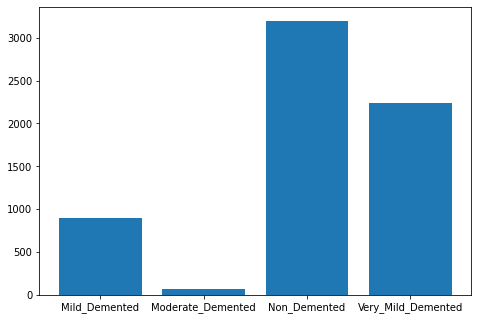

In [ ]:
#Class - 1: Mild Demented (896 images)
#Class - 2: Moderate Demented (64 images)
#Class - 3: Non Demented (3200 images)
#Class - 4: Very Mild Demented (2240 images)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = [896,64,3200,2240] # provided with dataset info
ax.bar(class_names,size)
plt.show

In [ ]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix
# cf heat map function
def cf_matrix_heatmap(y_true, y_pred):
    data = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))  
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (5,3))
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 18},fmt='g',
    xticklabels=class_names, yticklabels=class_names)# font size
# plot function
def plot_curve(hist):
    epochs = hist.epoch
    f, ax = plt.subplots(ncols=2, figsize=(20,8))
    ax[0].plot(epochs, hist.history['loss'], label='Training Loss')
    ax[0].plot(epochs, hist.history['val_loss'], label='Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    ax[1].plot(epochs, hist.history['accuracy'], label='Training Accuracy')
    ax[1].plot(epochs, hist.history['val_accuracy'], label='Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend() 

# ANN

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 128)               6291584   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 6,300,100
Trainable params: 6,300,100
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=100, batch_size=64, verbose=1)

Epoch 1/100
80/80 [==============================] - 7s 33ms/step - loss: 2.2847 - accuracy: 0.4778 - val_loss: 0.8396 - val_accuracy: 0.6150
Epoch 2/100
80/80 [==============================] - 3s 29ms/step - loss: 0.9475 - accuracy: 0.5767 - val_loss: 0.8510 - val_accuracy: 0.6197
Epoch 3/100
80/80 [==============================] - 3s 30ms/step - loss: 0.9397 - accuracy: 0.5997 - val_loss: 1.0086 - val_accuracy: 0.5102
Epoch 4/100
80/80 [==============================] - 3s 30ms/step - loss: 0.8557 - accuracy: 0.6347 - val_loss: 0.6473 - val_accuracy: 0.7167
Epoch 5/100
80/80 [==============================] - 3s 30ms/step - loss: 0.7216 - accuracy: 0.6851 - val_loss: 0.6396 - val_accuracy: 0.7340
Epoch 6/100
80/80 [==============================] - 3s 29ms/step - loss: 0.6077 - accuracy: 0.7394 - val_loss: 1.2977 - val_accuracy: 0.5446
Epoch 7/100
80/80 [==============================] - 3s 29ms/step - loss: 0.7013 - accuracy: 0.7064 - val_loss: 0.5742 - val_accuracy: 0.7433
Epoch 

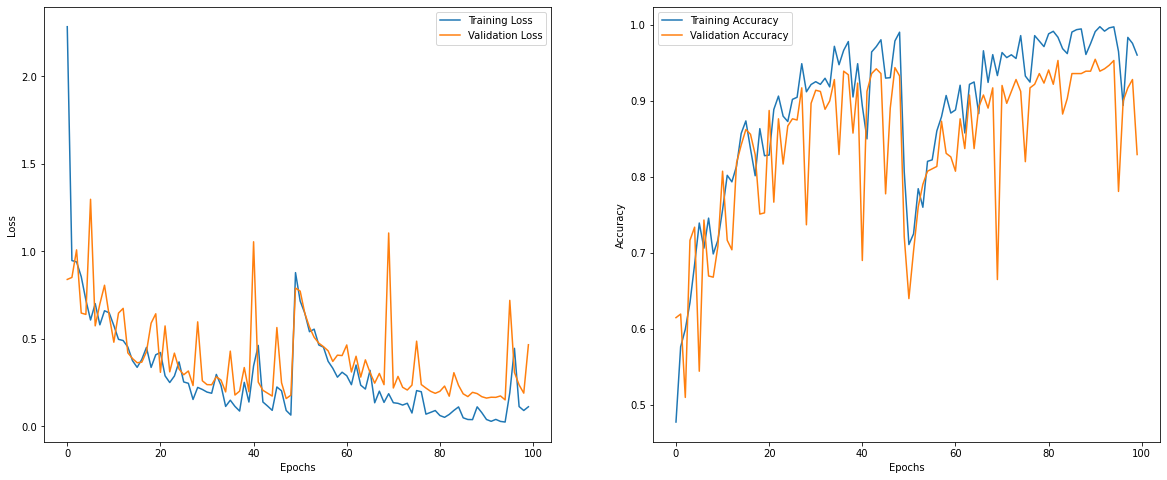

In [ ]:
plot_curve(hist)

In [ ]:
loss, accuracy = model.evaluate(test_ds)

11/11 [==============================] - 0s 10ms/step - loss: 0.5157 - accuracy: 0.8178


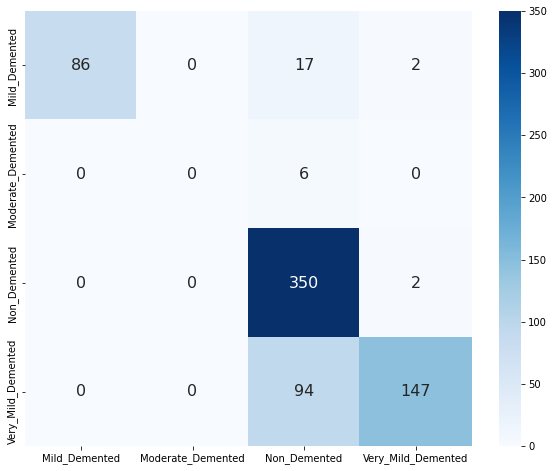

In [ ]:
y_true = [] # ground_truth
y_pred = []
for ds in test_ds:
  image_batch, label_batch = test_ds.as_numpy_iterator().next()
  predictions = model.predict_on_batch(image_batch)
  predictions = np.argmax(predictions, axis=1)
  y_true += label_batch.tolist()
  y_pred += predictions.tolist()
cnf_matrix = confusion_matrix(y_true, y_pred)
df_cnf = pd.DataFrame(cnf_matrix, class_names, class_names)
plt.figure(figsize=(10, 8))
sn.heatmap(df_cnf, annot=True, cmap='Blues', annot_kws={"size": 16},fmt='g')
plt.show()

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       105
           1       0.00      0.00      0.00         6
           2       0.75      0.99      0.85       352
           3       0.97      0.61      0.75       241

    accuracy                           0.83       704
   macro avg       0.68      0.61      0.63       704
weighted avg       0.86      0.83      0.82       704



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import fbeta_score
fbeta_score(y_true, y_pred, average='macro', beta=2)

0.6105821324967358

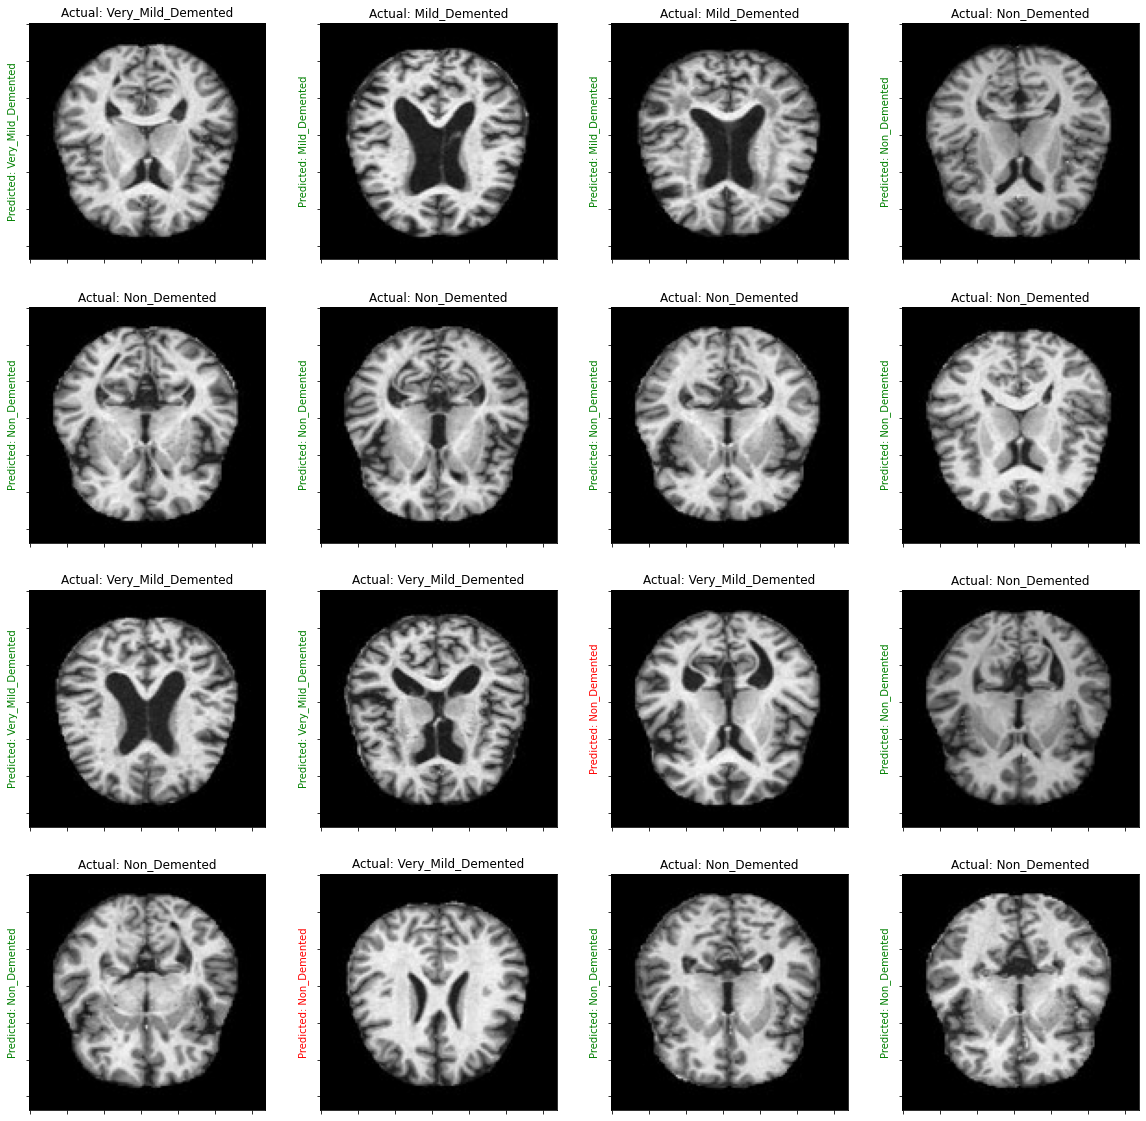

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

# CNN

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))

model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)       

In [ ]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=100, batch_size=64, verbose=1)

Epoch 1/100
80/80 [==============================] - 4s 39ms/step - loss: 1.2116 - accuracy: 0.4929 - val_loss: 0.9663 - val_accuracy: 0.5227
Epoch 2/100
80/80 [==============================] - 3s 38ms/step - loss: 0.9036 - accuracy: 0.5808 - val_loss: 0.8450 - val_accuracy: 0.6495
Epoch 3/100
80/80 [==============================] - 3s 37ms/step - loss: 0.8110 - accuracy: 0.6316 - val_loss: 0.7782 - val_accuracy: 0.6635
Epoch 4/100
80/80 [==============================] - 3s 38ms/step - loss: 0.6957 - accuracy: 0.6956 - val_loss: 0.6733 - val_accuracy: 0.7433
Epoch 5/100
80/80 [==============================] - 3s 37ms/step - loss: 0.5919 - accuracy: 0.7535 - val_loss: 0.6421 - val_accuracy: 0.6917
Epoch 6/100
80/80 [==============================] - 3s 37ms/step - loss: 0.4940 - accuracy: 0.7918 - val_loss: 0.4168 - val_accuracy: 0.8623
Epoch 7/100
80/80 [==============================] - 3s 37ms/step - loss: 0.4008 - accuracy: 0.8355 - val_loss: 0.3457 - val_accuracy: 0.8873
Epoch 

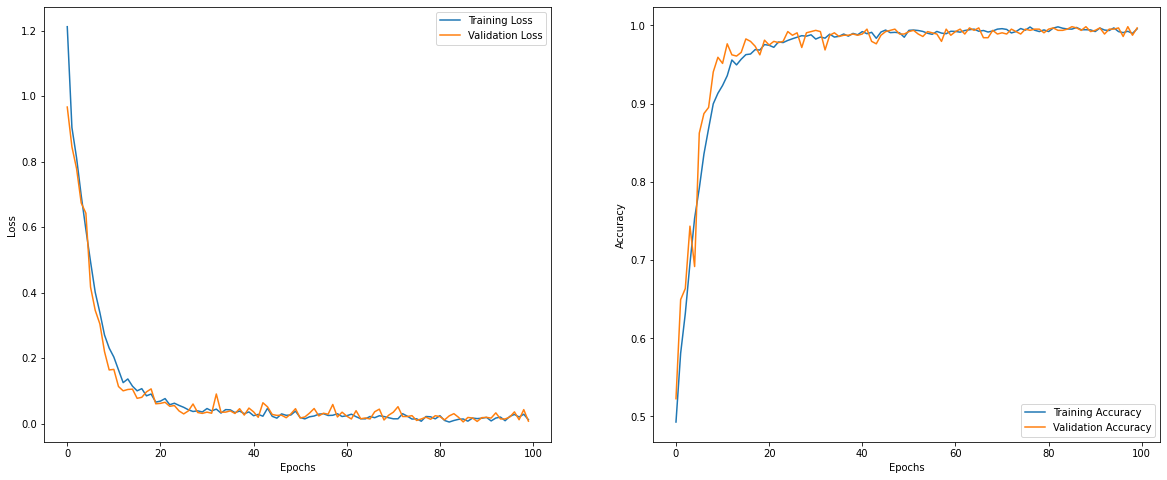

In [ ]:
plot_curve(hist)

In [ ]:
loss, accuracy = model.evaluate(test_ds)

11/11 [==============================] - 0s 25ms/step - loss: 0.0208 - accuracy: 0.9953


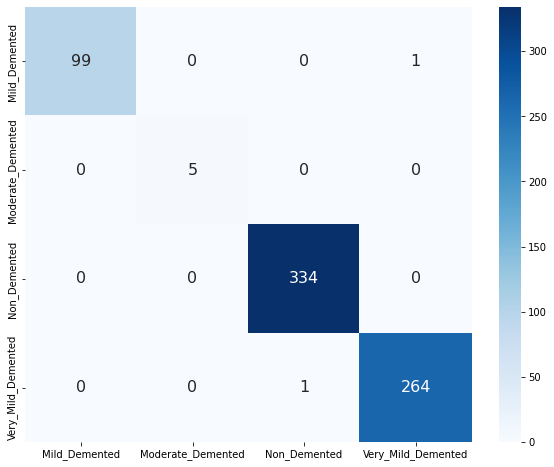

In [ ]:
y_true = [] # ground_truth
y_pred = []
for ds in test_ds:
  image_batch, label_batch = test_ds.as_numpy_iterator().next()
  predictions = model.predict_on_batch(image_batch)
  predictions = np.argmax(predictions, axis=1)
  y_true += label_batch.tolist()
  y_pred += predictions.tolist()
cnf_matrix = confusion_matrix(y_true, y_pred)
df_cnf = pd.DataFrame(cnf_matrix, class_names, class_names)
plt.figure(figsize=(10, 8))
sn.heatmap(df_cnf, annot=True, cmap='Blues', annot_kws={"size": 16},fmt='g')
plt.show()

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00       334
           3       1.00      1.00      1.00       265

    accuracy                           1.00       704
   macro avg       1.00      1.00      1.00       704
weighted avg       1.00      1.00      1.00       704



In [ ]:
from sklearn.metrics import fbeta_score
fbeta_score(y_true, y_pred, average='macro', beta=2)

0.9969029847461823

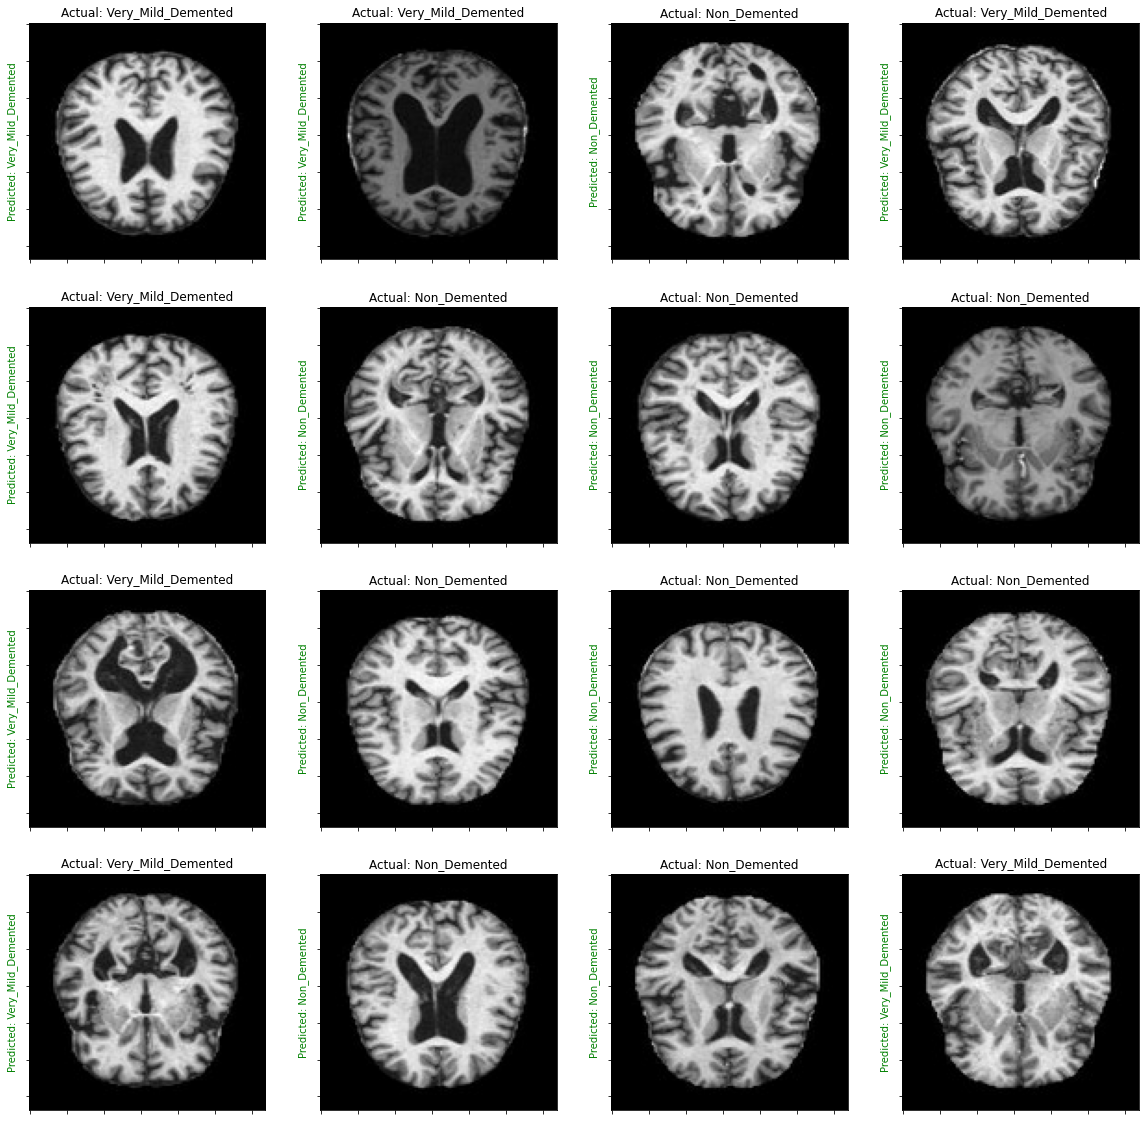

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

# CRNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same' , activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same' , activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same' , activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same' , activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same' , activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(1,2), strides=(1,2)))
model.add(Dropout(0.25))

model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(GRU(hidden_unit,return_sequences=True)))
model.add(Flatten())
model.add(Dense(128 , activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(4, activation = "softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 128)     3584      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 128)    512       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 64)       

In [ ]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=100, batch_size=64, verbose=1)

Epoch 1/100
80/80 [==============================] - 25s 226ms/step - loss: 1.4966 - accuracy: 0.4251 - val_loss: 1.1258 - val_accuracy: 0.5211
Epoch 2/100
80/80 [==============================] - 11s 140ms/step - loss: 1.0430 - accuracy: 0.5589 - val_loss: 1.4796 - val_accuracy: 0.3505
Epoch 3/100
80/80 [==============================] - 12s 142ms/step - loss: 0.9036 - accuracy: 0.6044 - val_loss: 1.6164 - val_accuracy: 0.3787
Epoch 4/100
80/80 [==============================] - 12s 143ms/step - loss: 0.8331 - accuracy: 0.6279 - val_loss: 1.9525 - val_accuracy: 0.3505
Epoch 5/100
80/80 [==============================] - 12s 143ms/step - loss: 0.7536 - accuracy: 0.6687 - val_loss: 2.1345 - val_accuracy: 0.5070
Epoch 6/100
80/80 [==============================] - 11s 141ms/step - loss: 0.6901 - accuracy: 0.6972 - val_loss: 1.7796 - val_accuracy: 0.5321
Epoch 7/100
80/80 [==============================] - 12s 142ms/step - loss: 0.6401 - accuracy: 0.7259 - val_loss: 0.8191 - val_accuracy:

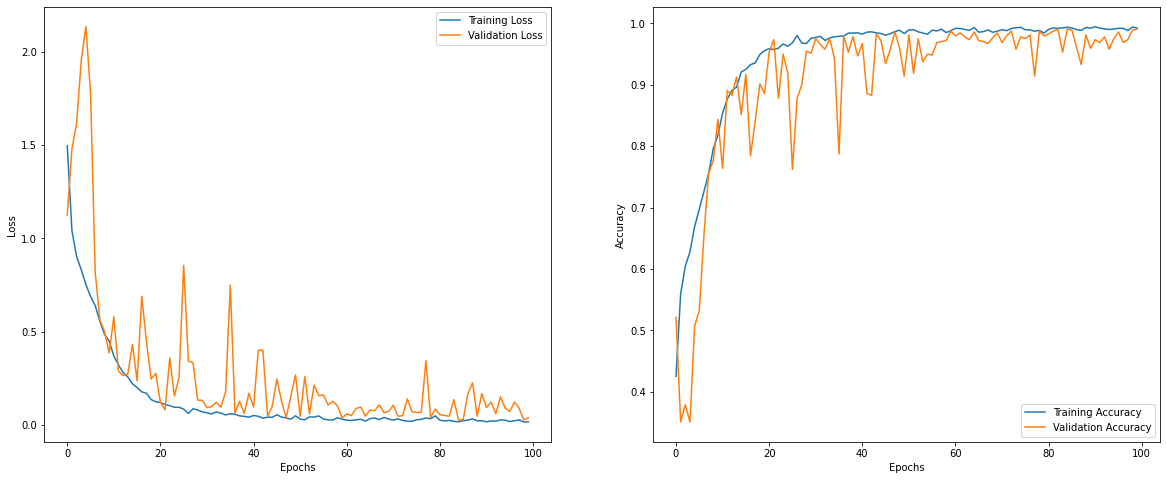

In [ ]:
plot_curve(hist)

In [ ]:
loss, accuracy = model.evaluate(test_ds)

11/11 [==============================] - 1s 54ms/step - loss: 0.0194 - accuracy: 0.9969


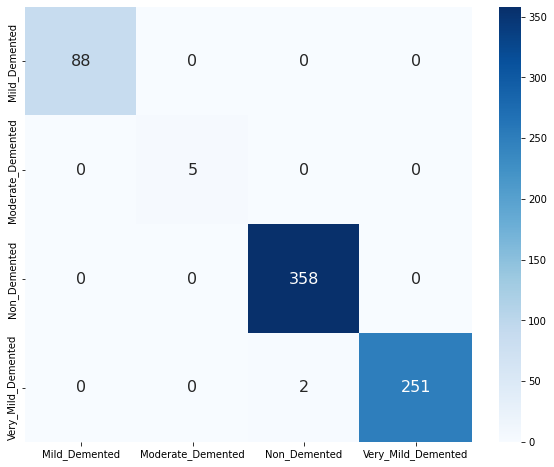

In [ ]:
y_true = [] # ground_truth
y_pred = []
for ds in test_ds:
  image_batch, label_batch = test_ds.as_numpy_iterator().next()
  predictions = model.predict_on_batch(image_batch)
  predictions = np.argmax(predictions, axis=1)
  y_true += label_batch.tolist()
  y_pred += predictions.tolist()
cnf_matrix = confusion_matrix(y_true, y_pred)
df_cnf = pd.DataFrame(cnf_matrix, class_names, class_names)
plt.figure(figsize=(10, 8))
sn.heatmap(df_cnf, annot=True, cmap='Blues', annot_kws={"size": 16},fmt='g')
plt.show()

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00         5
           2       0.99      1.00      1.00       358
           3       1.00      0.99      1.00       253

    accuracy                           1.00       704
   macro avg       1.00      1.00      1.00       704
weighted avg       1.00      1.00      1.00       704



In [ ]:
from sklearn.metrics import fbeta_score
fbeta_score(y_true, y_pred, average='macro', beta=2)

0.9981374508681146

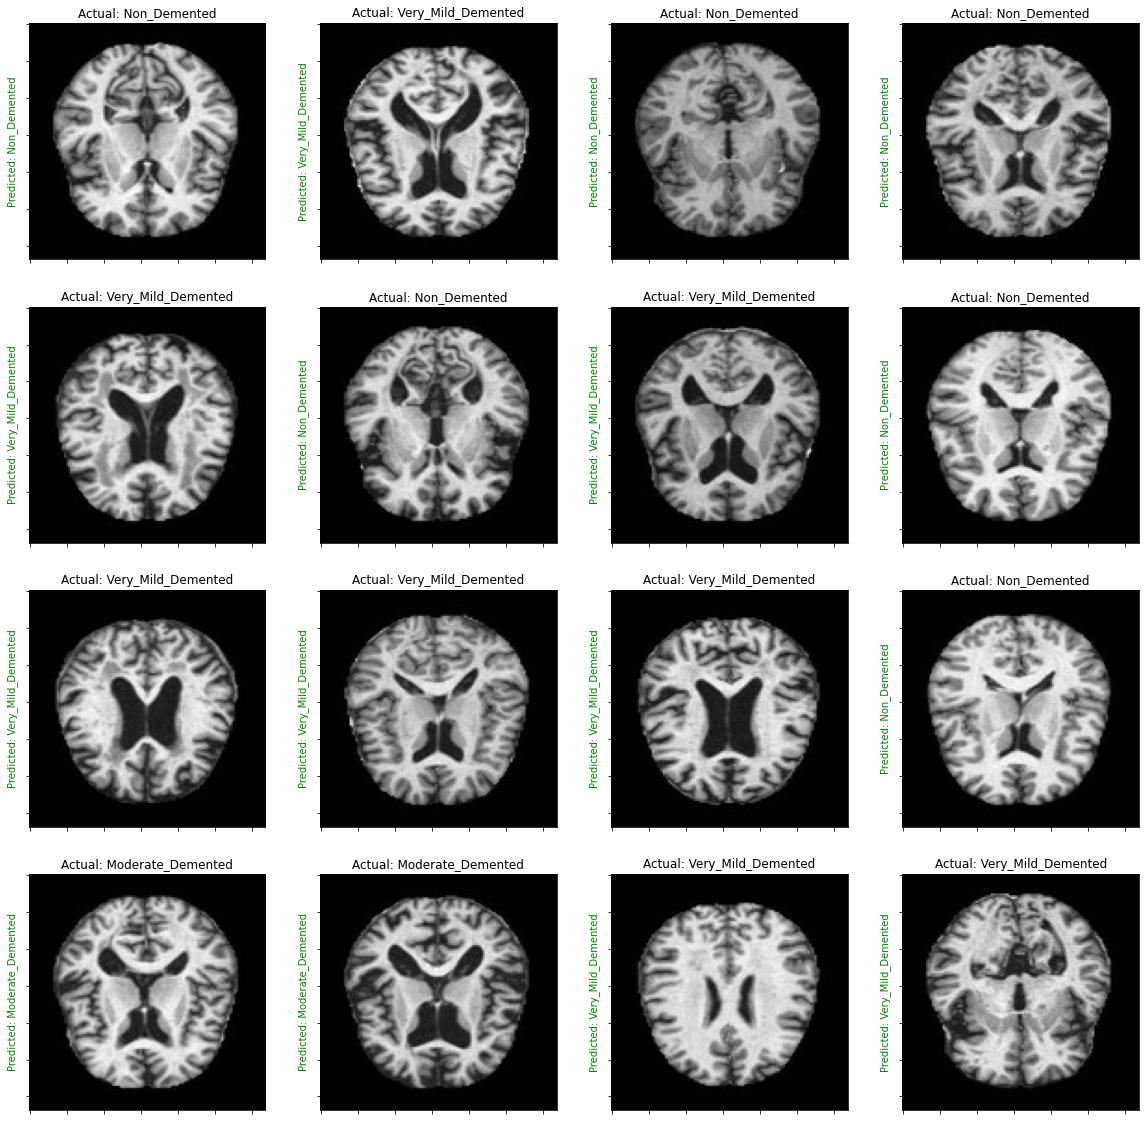

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])